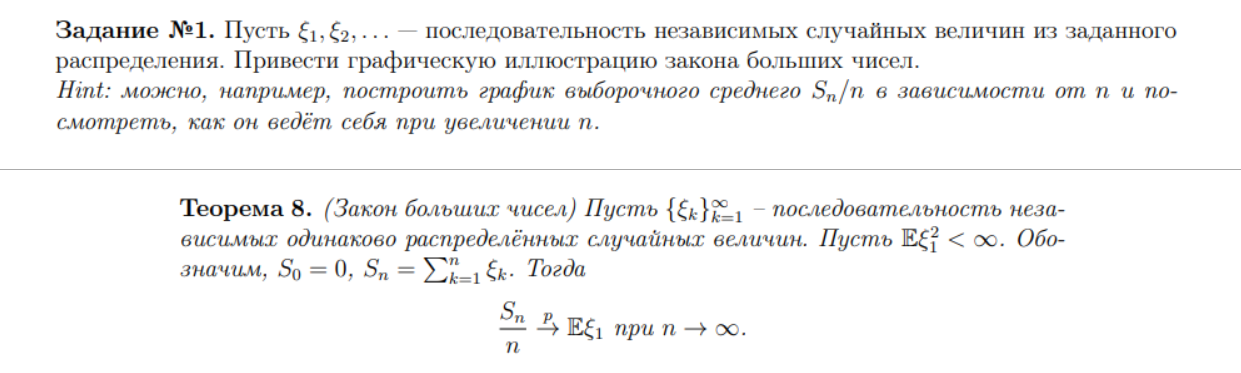

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import randint

In [3]:
a = 3
b = 10

In [4]:
n_vals = [10, 100, 1000, 10000] # Define the number of samples to draw
dist = randint(a, b+1) # Create the distribution object
samples = dist.rvs(size = max(n_vals)) # Draw samples from the distribution

In [5]:
sample_means = np.cumsum(samples)/np.arange(1, max(n_vals)+1) # Compute the sample means as a function of n
true_mean = dist.mean()
convergence_rate = (np.sqrt(2/np.pi)*np.sqrt(dist.var()))/np.sqrt(np.arange(1, max(n_vals)+1)) # Compute the convergence rate

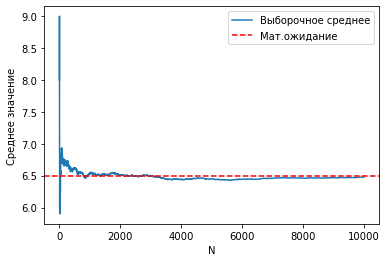

In [6]:
plt.plot(np.arange(1, max(n_vals)+1), sample_means)
plt.axhline(true_mean, color='red', linestyle='--')
plt.xlabel('N')
plt.ylabel('Среднее значение')
plt.legend(['Выборочное среднее', 'Мат.ожидание'])
plt.show()

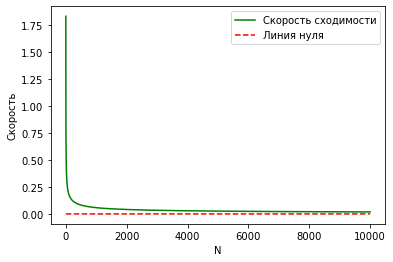

In [7]:
plt.plot(np.arange(1, max(n_vals)+1), convergence_rate, color='green')
plt.plot(np.arange(1, max(n_vals)+1), np.zeros(max(n_vals), dtype = int), color='red', linestyle='--')
plt.xlabel('N')
plt.ylabel('Скорость')
plt.legend(['Скорость сходимости', 'Линия нуля'])
plt.show()

In [20]:
nsim = 500
sample_means = np.zeros((nsim, max(n_vals)))
for i in range (nsim):
    sample = dist.rvs(size = max(n_vals))
    for j in range(1, max(n_vals)):
        sample_1 = sample[1:j]
        sample_means[i, j] = np.abs(np.sum(sample_1)/j - true_mean)

In [21]:
# sample_convergence_rate = np.abs((np.cumsum(samples)[2000::]/np.arange(2000, 10000)) - true_mean)
sample_convergence_rate = np.zeros(max(n_vals))
for i in range (max(n_vals)):
    sample_convergence_rate[i] = np.mean(sample_means[::, i])

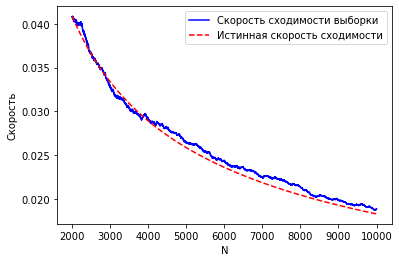

In [22]:
plt.plot(np.arange(2001, max(n_vals)+1), sample_convergence_rate[2000::], color='blue')
plt.plot(np.arange(2001, max(n_vals)+1), convergence_rate[2000::], color='red', linestyle='--')
plt.xlabel('N')
plt.ylabel('Скорость')
plt.legend(['Скорость сходимости выборки', 'Истинная скорость сходимости'])
plt.show()

In [12]:
i = 0
print('n при котором выборочное среднее сходится к мат.ожиданию:')
while(i!=np.size(convergence_rate)):
    if(round(convergence_rate[i], 0)==0):
        print(i, '  ')
        break
    i+=1

n при котором выборочное среднее сходится к мат.ожиданию:
168   
